# 2022년도 확률과통계 중간고사 
# 201935321 이창민

## 11. 

### (a)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'00시': [38, 22, 18], '02시':[31, 14, 16], '04시':[36, 20, 15], '06시':[29, 14, 12],
        '08시': [42, 23, 17], '10시': [51, 40, 34], '12시': [39, 22, 15], '14시': [47, 31, 18],
        '16시': [37, 22, 20], '18시': [46, 37, 36], '20시': [45, 25, 23], '22시': [39, 24 ,22]}\

df = pd.DataFrame(data, index=['BOD', 'COD', 'SS'])
df.columns.name = '시각'
df

시각,00시,02시,04시,06시,08시,10시,12시,14시,16시,18시,20시,22시
BOD,38,31,36,29,42,51,39,47,37,46,45,39
COD,22,14,20,14,23,40,22,31,22,37,25,24
SS,18,16,15,12,17,34,15,18,20,36,23,22


### (b)

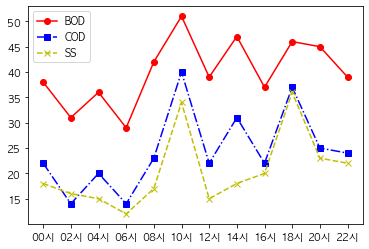

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "AppleGothic"  # 맥 사용자

x = list(data.keys())
bod = df.loc['BOD'].values
cod = df.loc['COD'].values
ss = df.loc['SS'].values
plt.plot(x, bod, 'o', linestyle='-', color='r', label='BOD')
plt.plot(x, cod, 's', linestyle='-.', color='b', label='COD')
plt.plot(x, ss, 'x', linestyle='--', color='y', label='SS')
plt.legend()
plt.show()

## 12.

### (a)

In [42]:
import pandas as pd

data = [9, 9, 9, 10, 2, 1]
k = 6
w = 10
s = 9.5

bins = [s + i*w for i in range(k+1)]
index = [ f'{bins[i]} ~ {bins[i]+w}' for i in range(k)]

df = pd.DataFrame(data, index=index, columns=['도수'])
df.index.name = '계급간격'
df['상대도수'] = [x/sum(data) for x in data]

df['계급값'] = [ (bins[x]+bins[x+1])/2 for x in range(k)]

x_ = sum([ df['도수'][idx] * i for idx, i in enumerate(df['계급값']) ]) / sum(df['도수'])
df['fi*x'] = [ i*x for i, x in zip(df['도수'], df['계급값'])]
df['(x-x_)^2'] = [ (x - x_)**2 for x in df['계급값'] ]
df['(x-x_)^2*fi'] = [ (x - x_)**2*i for i, x in zip(df['도수'],df['계급값']) ]


df

,도수,상대도수,계급값,fi*x,(x-x_)^2,(x-x_)^2*fi
계급간격,,,,,,
9.5 ~ 19.5,9,0.225,14.5,130.5,306.25,2756.25
19.5 ~ 29.5,9,0.225,24.5,220.5,56.25,506.25
29.5 ~ 39.5,9,0.225,34.5,310.5,6.25,56.25
39.5 ~ 49.5,10,0.250,44.5,445.0,156.25,1562.50
49.5 ~ 59.5,2,0.050,54.5,109.0,506.25,1012.50
59.5 ~ 69.5,1,0.025,64.5,64.5,1056.25,1056.25


### (b)

In [43]:
import math
ss = sum(df['(x-x_)^2*fi']) / sum(df['도수']) - 1 # 표본표준편차이므로 n-1을 하였음
s = math.sqrt(ss)
print(f'자료의 표본표준편자를 구하시오: {s:1.5}')

자료의 표본표준편자를 구하시오: 13.143


## 13.

### (a)

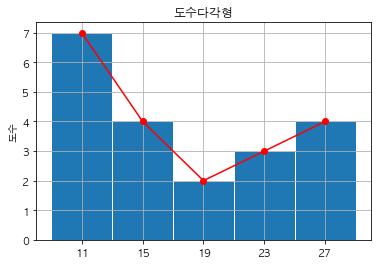

In [44]:
import math
import numpy as np
import matplotlib.pyplot as plt
data = [12.6, 10.5, 25.2, 20.9, 29.5, 28.3, 12.9, 11.2, 26.1, 23.6,
        18.2, 13.1, 14.8, 11.1, 10.2, 16.9, 26.7, 16.7, 23.6, 17.5]

k = 5
R = max(data) - min(data)
w = math.ceil(R/k)
s = min(data)-0.5
bins = [s + i*w for i in range(k+1)]  #계급
hist, bins = np.histogram(data, bins)
index = [f'{bins[i]} ~ {bins[i+1]}' for i in range(len(bins)) if i<(len(bins)-1) ]
df = pd.DataFrame(hist, index=index, columns=['도수'])
df['계급값'] = [ int((bins[x]+bins[x+1])/2) for x in range(k)]

x = df['계급값'].values[:k]
y = df['도수'].values[:k]

plt.bar(x, y, width=4, edgecolor='w')
plt.plot(x,y, 'o', linestyle='-', color='r')
plt.title('도수다각형')
plt.ylabel('도수')
plt.xticks(ticks=x, labels=x)
plt.grid()
plt.show()

